In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants

In [2]:
kScore = "cohens kappa score"
f1Score = "f1 score"

# Settings

In [3]:
ignoreSet = ["ozone_level", "yeast_me2"]

gans = ["SimpleGAN", "Repeater", "convGAN"]
algs = {"LR", "GB", "KNN"}

# ProWRAS Data

In [4]:
dataset  = [
    "abalone9-18",
    "abalone_17_vs_7_8_9_10",
    "car-vgood","car_good",
    "flare-F",
    "hypothyroid",
    "kddcup-guess_passwd_vs_satan",
    "kr-vs-k-three_vs_eleven",
    "kr-vs-k-zero-one_vs_draw",
    "shuttle-2_vs_5",
    "winequality-red-4",
    "yeast4",
    "yeast5",
    "yeast6",
    "ozone_level",
    "yeast_me2",
    "Average"
    ]

In [5]:
knn_ProWRAS_f1 = [0.384,0.347,0.818,0.641,0.301,0.553,1.0,0.94,0.9,1.0,0.141,0.308,0.714,0.545,0.556,0.339,0.538]
knn_ProWRAS_k = [0.35,0.328,0.81,0.622,0.263,0.528,1.0,0.938,0.896,1.0,0.093,0.268,0.704,0.531,0.526,0.305,0.515]

lr_ProWRAS_f1 = [0.488,0.315,0.407,0.103,0.341,0.446,0.99,0.928,0.853,1.0,0.158,0.308,0.591,0.326,0.347,0.295,0.472]
lr_ProWRAS_k = [0.446,0.287,0.371,0.033,0.3,0.407,0.99,0.926,0.847,1.0,0.119,0.268,0.574,0.3,0.319,0.254,0.441]

gb_ProWRAS_f1 = [0.385,0.335,0.959,0.863,0.320,0.803,0.998,0.995,0.969,1.0,0.156,0.335,0.735,0.514,0.329,0.225,0.600]
gb_ProWRAS_k = [0.341,0.310,0.957,0.857,0.291,0.794,0.998,0.995,0.967,1.0,0.115,0.303,0.726,0.501,0.303,0.328,0.589]

In [6]:
statistic = { "ProWRAS": {} }
for (n, f1, k) in zip(dataset, lr_ProWRAS_f1, lr_ProWRAS_k):
    if n in ignoreSet:
        continue
    
    if n not in statistic["ProWRAS"]:
        statistic["ProWRAS"][n] = {}
    
    statistic["ProWRAS"][n]["LR"] = { kScore: k, f1Score: f1 }

for (n, f1, k) in zip(dataset, gb_ProWRAS_f1, gb_ProWRAS_k):
    if n in ignoreSet:
        continue
    
    if n not in statistic["ProWRAS"]:
        statistic["ProWRAS"][n] = {}
    
    statistic["ProWRAS"][n]["GB"] = { kScore: k, f1Score: f1 }

    
for (n, f1, k) in zip(dataset, knn_ProWRAS_f1, knn_ProWRAS_k):
    if n in ignoreSet:
        continue
    
    if n not in statistic["ProWRAS"]:
        statistic["ProWRAS"][n] = {}
    
    statistic["ProWRAS"][n]["KNN"] = { kScore: k, f1Score: f1 }
    
dataset = list(filter(lambda n: n not in ignoreSet, dataset))

# Load data from CSV files

In [7]:
def loadDiagnoseData(ganType, datasetName):
    fileName = f"{ganType}/folding_{datasetName}.csv"
    r = {}
    try:
        with open(fileName) as f:
            newBlock = True
            n = ""
            for line in f:
                line = line.strip()
                if newBlock:
                    n = line
                    newBlock = False
                elif line == "---":
                    newBlock = True
                else:
                    parts = line.split(";")
                    if parts[0] == "avg":
                        r[n] = { f1Score: float(parts[5]), kScore: float(parts[6]) }
    except FileNotFoundError as e:
        print(f"Missing file: {fileName}")
    return r

In [8]:
for gan in gans:
    if gan not in statistic:
        statistic[gan] = {}
    
    for ds in dataset:
        if ds != "Average":
            statistic[gan][ds] = loadDiagnoseData(gan, ds)

In [9]:
for gan in statistic.keys():
    f1 = { n: 0.0 for n in algs }
    k =  { n: 0.0 for n in algs }
    c = 0

    for ds in dataset:
        if ds != "Average":
            c += 1
            for n in algs:
                if n in statistic[gan][ds].keys():
                    f1[n] += statistic[gan][ds][n][f1Score]
                    k[n] += statistic[gan][ds][n][kScore]

    avg = {}
    for n in algs:
        avg[n] = { f1Score: f1[n] / c, kScore: k[n] / c }
    statistic[gan]["Average"] = avg

# Show Statistics

In [10]:
def showDiagnose(algo, score):
    def gr(n):
        if n in resultList:
            return resultList[n][algo].data[score]
        else:
            return 0.0
    
    print(f"{algo}: {score}")
    
    gans = list(statistic.keys())

    w = 0.8 / len(gans)
    bar = range(len(dataset))
    plt.figure(figsize=(20, 8))
    for g in gans:
        values = [
                 (statistic[g][d][algo][score] if algo in statistic[g][d].keys() else 0.0)
                 for d in dataset
                 ]
        plt.bar(bar, values, w, label=g)
        
        
        bar = [i + w for i in bar]
        
    plt.xlabel("Dataset")
    plt.ylabel(score)
    plt.xticks(range(len(dataset)), dataset)
    plt.xticks(rotation="vertical")
    plt.legend()
    plt.show()

LR: f1 score


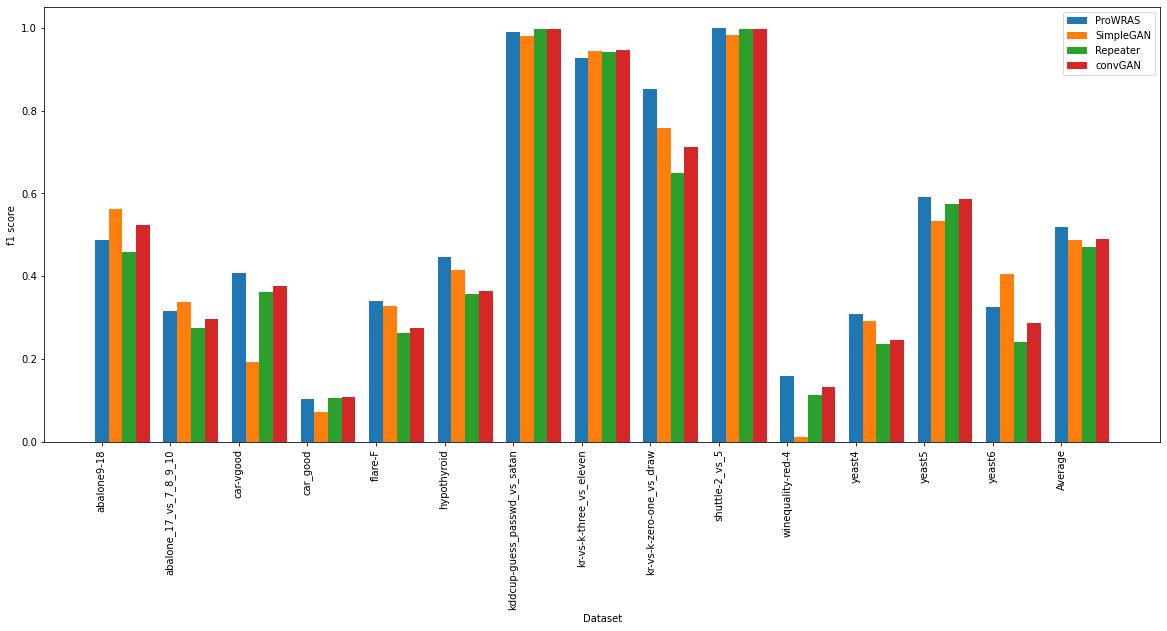

LR: cohens kappa score


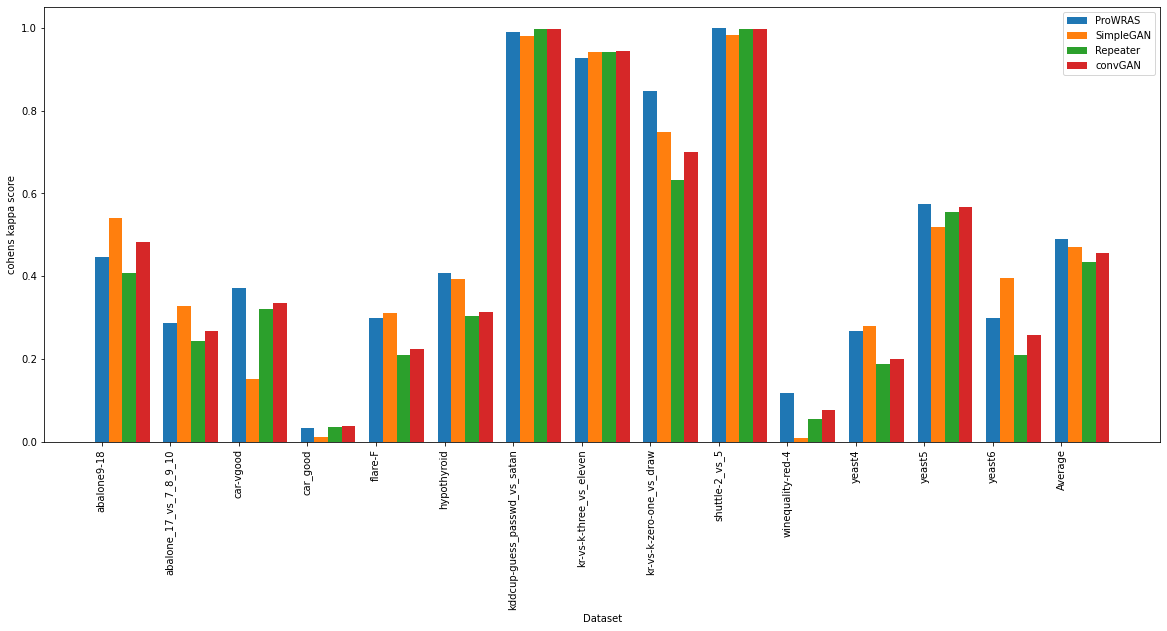

KNN: f1 score


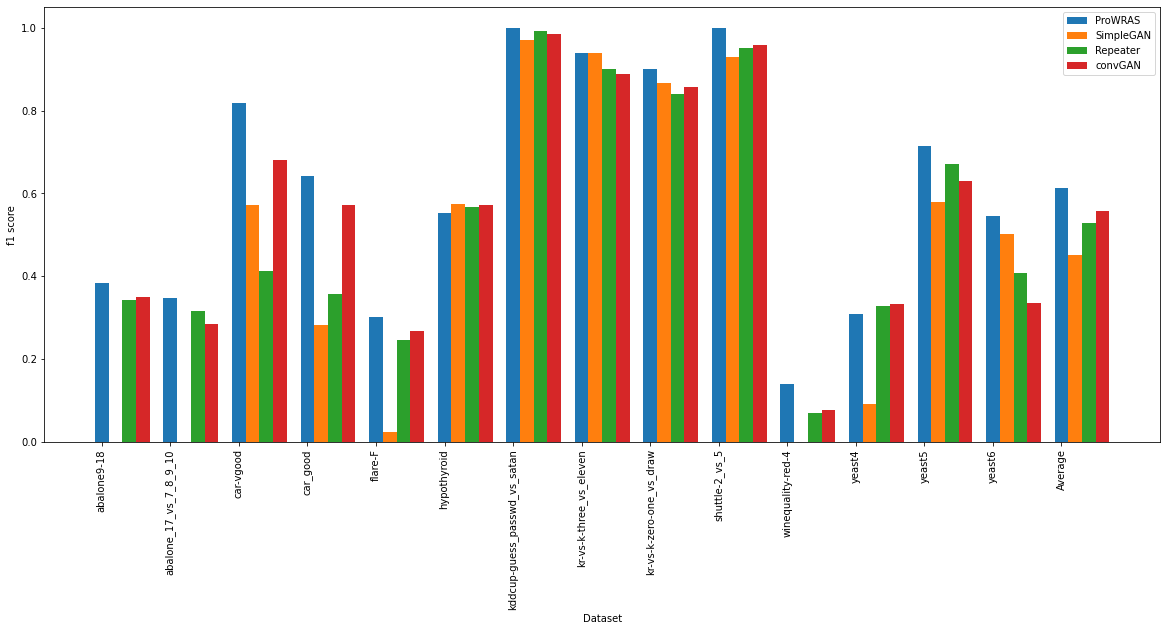

KNN: cohens kappa score


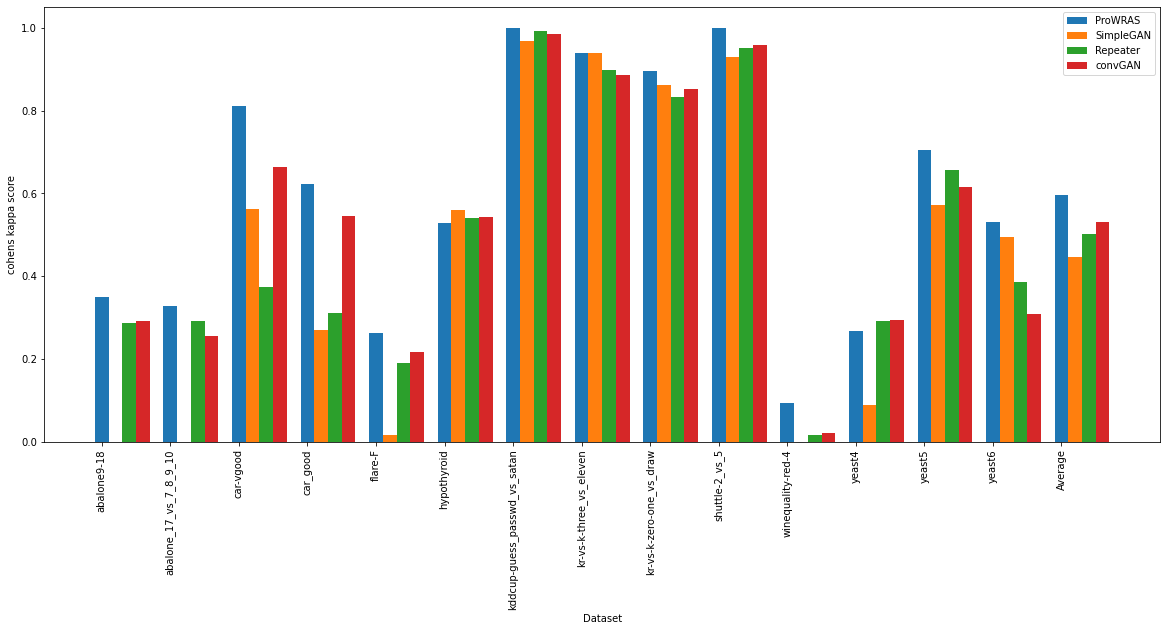

GB: f1 score


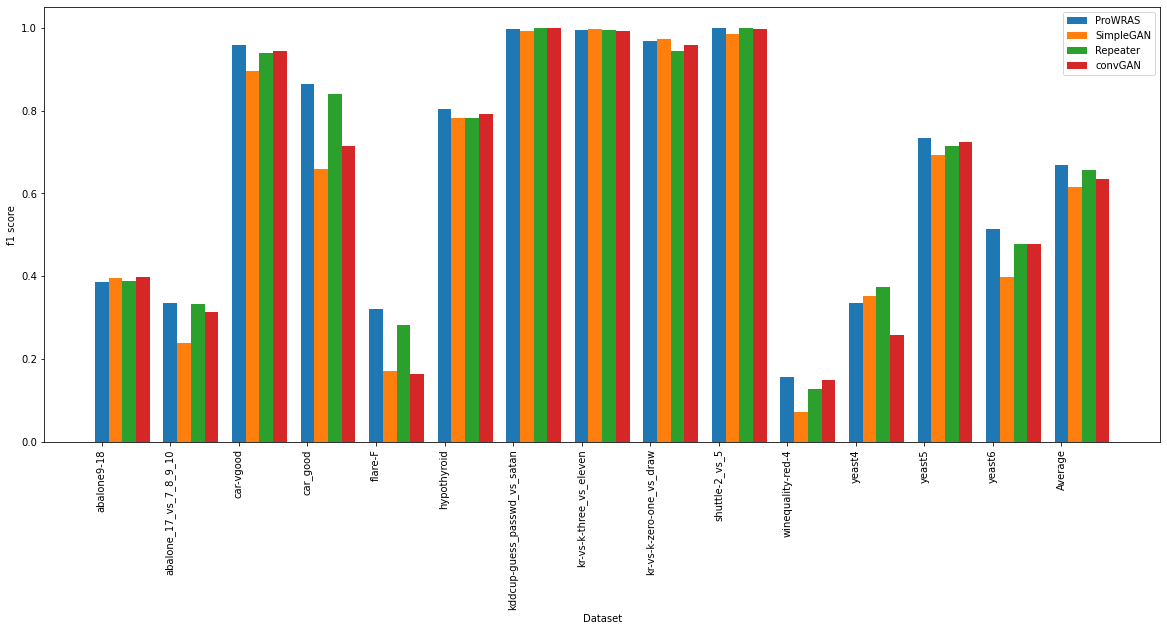

GB: cohens kappa score


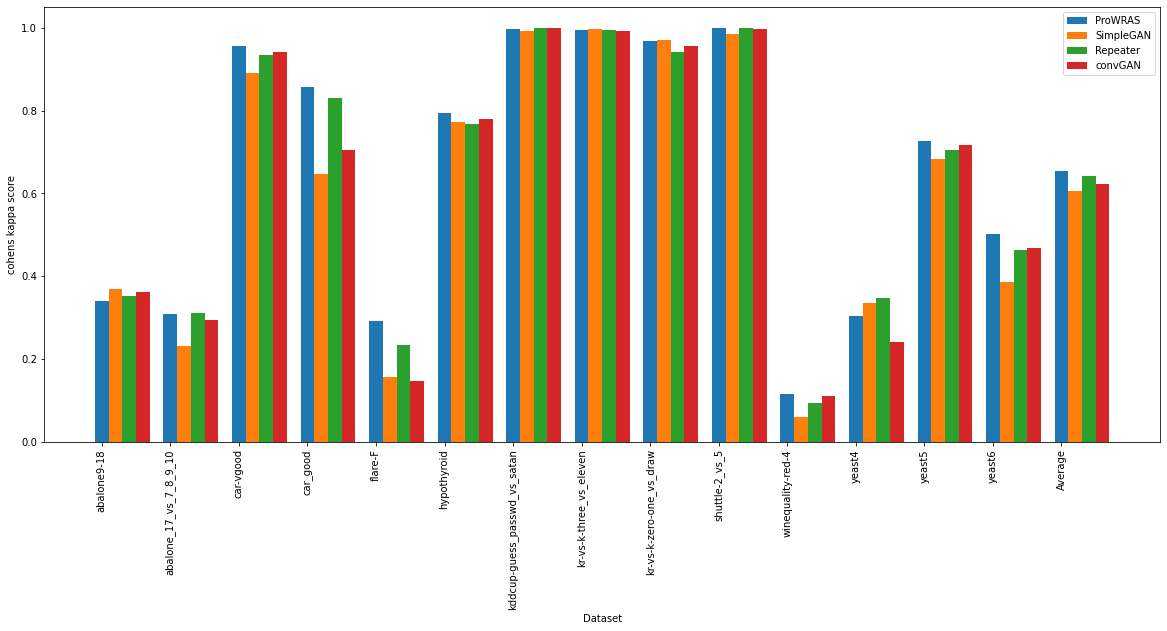

In [11]:
for a in algs:
    showDiagnose(a, f1Score)
    showDiagnose(a, kScore)